![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)
# <font color='Blue'>Ciência dos Dados na Prática</font>

# <font color='purple'> Fake Currency Detection.ipynb </font>

![](http://bizbuzz.djournal.com/wp-content/uploads/2018/06/2HZQ0AW.gif) ![](https://1.bp.blogspot.com/-uicdbLsdub8/WzgMBhD2eTI/AAAAAAAAWqY/gilyuEyYxiUs29VnljbWImvHht0PI5slgCLcBGAs/s1600/cash-money-animated-gif-5.gif)




A detecção de moeda falsa **é um problema real**  para indivíduos e empresas. 

Os falsificadores estão constantemente encontrando novos métodos e técnicas para produzir notas falsas, que são essencialmente **indistinguíveis de dinheiro real. Pelo menos para o olho humano.**

![](http://pa1.narvii.com/6612/23471f7c5e30a19ee8ba2e4caf389384f932a128_00.gif)

# 1° Problema de Negócio:

Você como Cientista de Dados do Banco Central do Brasil, precisa criar uma Máquina Preditiva com aprendizado de máquina, cujo **objetivo é a Detecção de Cédulas falsas**.

A detecção de cédulas falsas é uma tarefa de classificação binária no aprendizado de máquina. Se tivermos dados suficientes sobre notas reais e falsas, podemos usar esses dados para treinar um modelo que pode classificar as novas notas como reais ou falsas.

**Fonte de Dados**⌨
![](https://res.cloudinary.com/practicaldev/image/fetch/s--RSJhBVz3--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/i/x40ppffg0gzjtf6sdxfu.png)

**Features Transformadas**

1. A **variancia** da imagem transformada em ondas
2. A **assimetria** da imagem transformada em ondas.
3. A **Curtose** da imagem transformada em ondaletas
4. A **Entropia** de imagem

In [2]:
# Importação de Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 2° Análise Exploratória

In [3]:
# Importação dos Dados
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/data_banknote_authentication.txt', header=None)
data.columns = ['var', 'skew', 'curt', 'entr', 'auth']
print(data.head())

       var    skew    curt     entr  auth
0  3.62160  8.6661 -2.8073 -0.44699     0
1  4.54590  8.1674 -2.4586 -1.46210     0
2  3.86600 -2.6383  1.9242  0.10645     0
3  3.45660  9.5228 -4.0112 -3.59440     0
4  0.32924 -4.4552  4.5718 -0.98880     0


In [4]:
# Dimensões do Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var     1372 non-null   float64
 1   skew    1372 non-null   float64
 2   curt    1372 non-null   float64
 3   entr    1372 non-null   float64
 4   auth    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


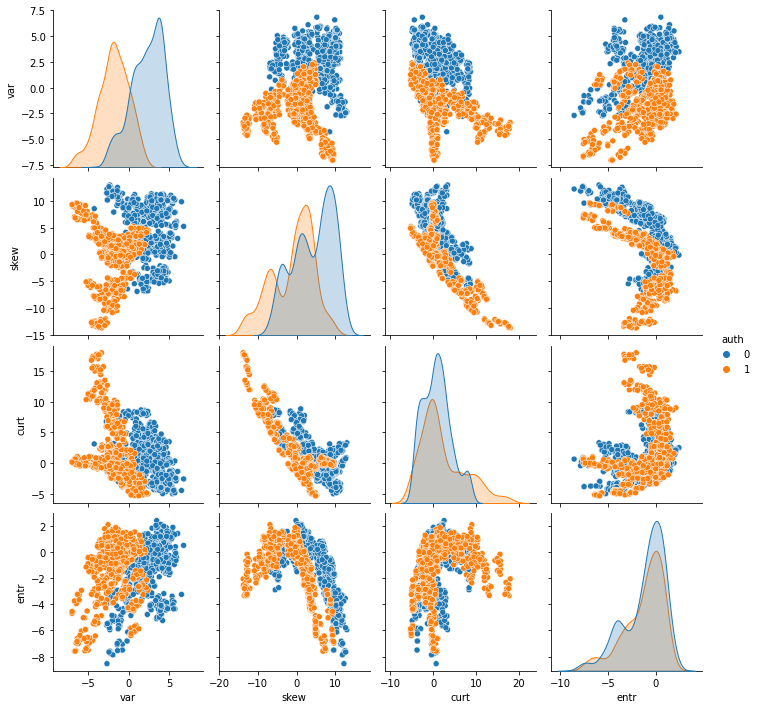

In [5]:
# Análise Gráfica
sns.pairplot(data, hue='auth')
plt.show()

#### Conclusões da Análise Gráf.
* A distribuição da variância e da assimetria parece ser bastante diferente para as duas características do alvo, enquanto a curtose e a entropia parecem ser mais semelhantes.
* Existem tendências lineares e não lineares claras nos recursos de entrada.
* Algumas características parecem estar correlacionadas.
* Algumas características parecem separar muito bem notas genuínas e falsas.

Agora vamos verificar se nossos dados estão equilibrados em relação aos valores do **Target**:

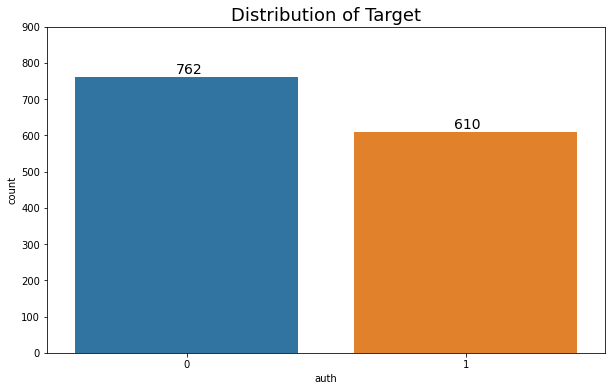

In [6]:
# Criação do Gráfico com Matplotlib
plt.figure(figsize=(10,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

O conjunto de dados **é bastante equilibrado**, mas para a tarefa de classificação binária, precisamos equilibrá-lo perfeitamente. Portanto, vamos começar a pré-processar os dados fazendo exatamente isso.

# 3° Pré-Processamento dos Dados

Processamento de dados
Agora precisamos equilibrar nossos dados, a maneira mais fácil de fazer isso é descartar aleatoriamente várias instâncias da função de destino super-representada. Isso é chamado de subamostragem aleatória.

Caso contrário, também poderíamos criar novos dados sintéticos para a classe de destino sub-representada. Isso é chamado de sobreamostragem. Por enquanto, vamos começar excluindo aleatoriamente 152 observações de notas reais:

## Subamostragem

In [7]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

1    610
0    610
Name: auth, dtype: int64


## Separação das Váriáveis de entrada (X) e Target (Y)

In [8]:
x = data.loc[:, data.columns != 'auth']
y = data.loc[:, data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Padronização das Variáveis

In [9]:
x.describe()

var         skew         curt         entr
count  1220.000000  1220.000000  1220.000000  1220.000000
mean      0.232598     1.592213     1.495487    -1.168082
std       2.856286     5.883801     4.402365     2.076326
min      -7.042100   -13.773100    -5.286100    -7.871900
25%      -1.939400    -2.194500    -1.525500    -2.357850
50%       0.236670     1.971000     0.628630    -0.586000
75%       2.557050     6.336150     3.443750     0.388023
max       6.824800    12.951600    17.927400     2.449500

In [10]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

# 4° Criação da Máquina Preditiva

In [11]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [12]:
y_pred = np.array(clf.predict(x_test))

# 5° Avaliação da Máquina

In [13]:

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            187              6
Act.Positive              0            173

 Accuracy = 98.36%


O modelo de regressão logística obteve acurácia de 98,36%. E não só isso, quando nosso modelo de detecção de moeda falsa previu que uma nota era real, ele estava correto 100% das vezes.

Agora vamos simular a previsão de uma única nota. Tudo o que precisamos fazer é extrair os recursos, dimensioná-los e integrá-los em nosso modelo pré-treinado. Também podemos inspecionar as probabilidades das notas de pertencer a cada classe-alvo:

## Utilizando a Máquina no Bacen

In [14]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.61112576 0.38887424]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Nosso modelo prevê que esta nota é real. Espero que tenha gostado deste artigo sobre detecção de moeda falsa com aprendizado de máquina. Sinta-se à vontade para fazer suas perguntas valiosas na seção de comentários abaixo.

#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="320" height="180" src="https://www.youtube.com/embed/WH6_pWe2_r0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')